#Customer Churn Prediction

## Tele-com data
Source- Kaggle

STEP1-DATA LOADING

1.1- Loading pandas library to read data

In [15]:
import pandas as pd

1.2- Loading The Dataset

In [16]:
data=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


STEP2-Exploratory data analysis (EDA):data shape,types and seaching for missing values

2.1-loading libraries required for EDA

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#shape of DataFrame
data.shape

(7043, 21)

In [19]:
#missing values
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [32]:
#Special attention to 'TotalCharges'- converting to scale
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [33]:
#finding missing value
data['TotalCharges'].isnull().sum()

np.int64(11)

In [34]:
#11 missing value found
## Impute missing 'TotalCharges' with the median
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


<ipython-input-34-c0ea9775f891>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


In [35]:
data['TotalCharges'].isnull().sum()

np.int64(0)

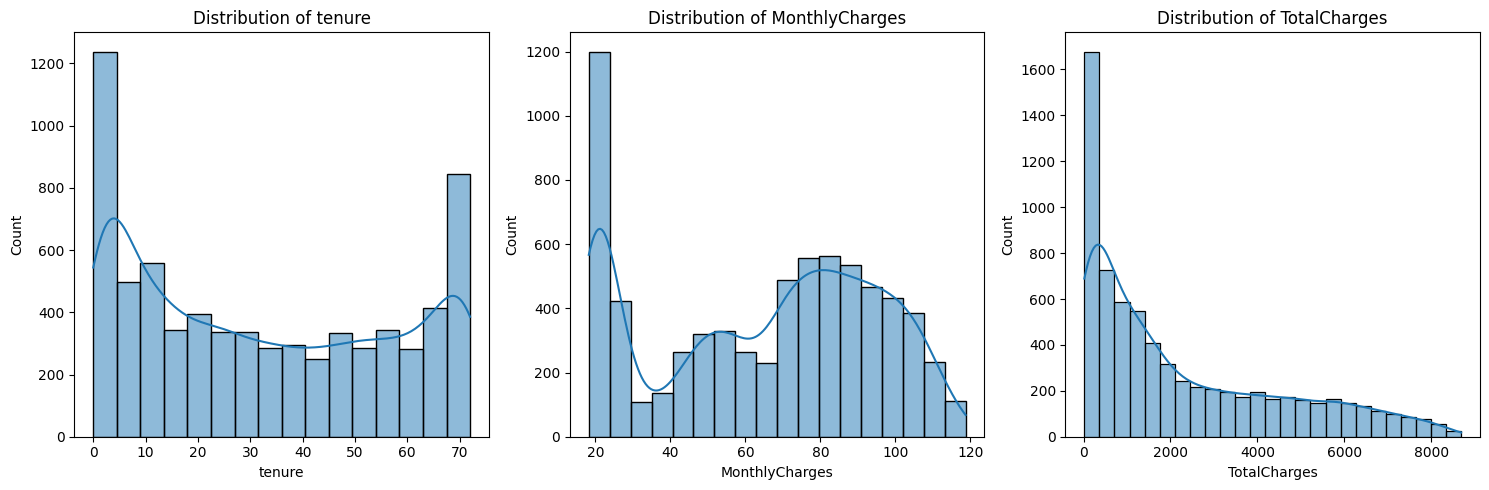

In [36]:
#  Distributions of numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

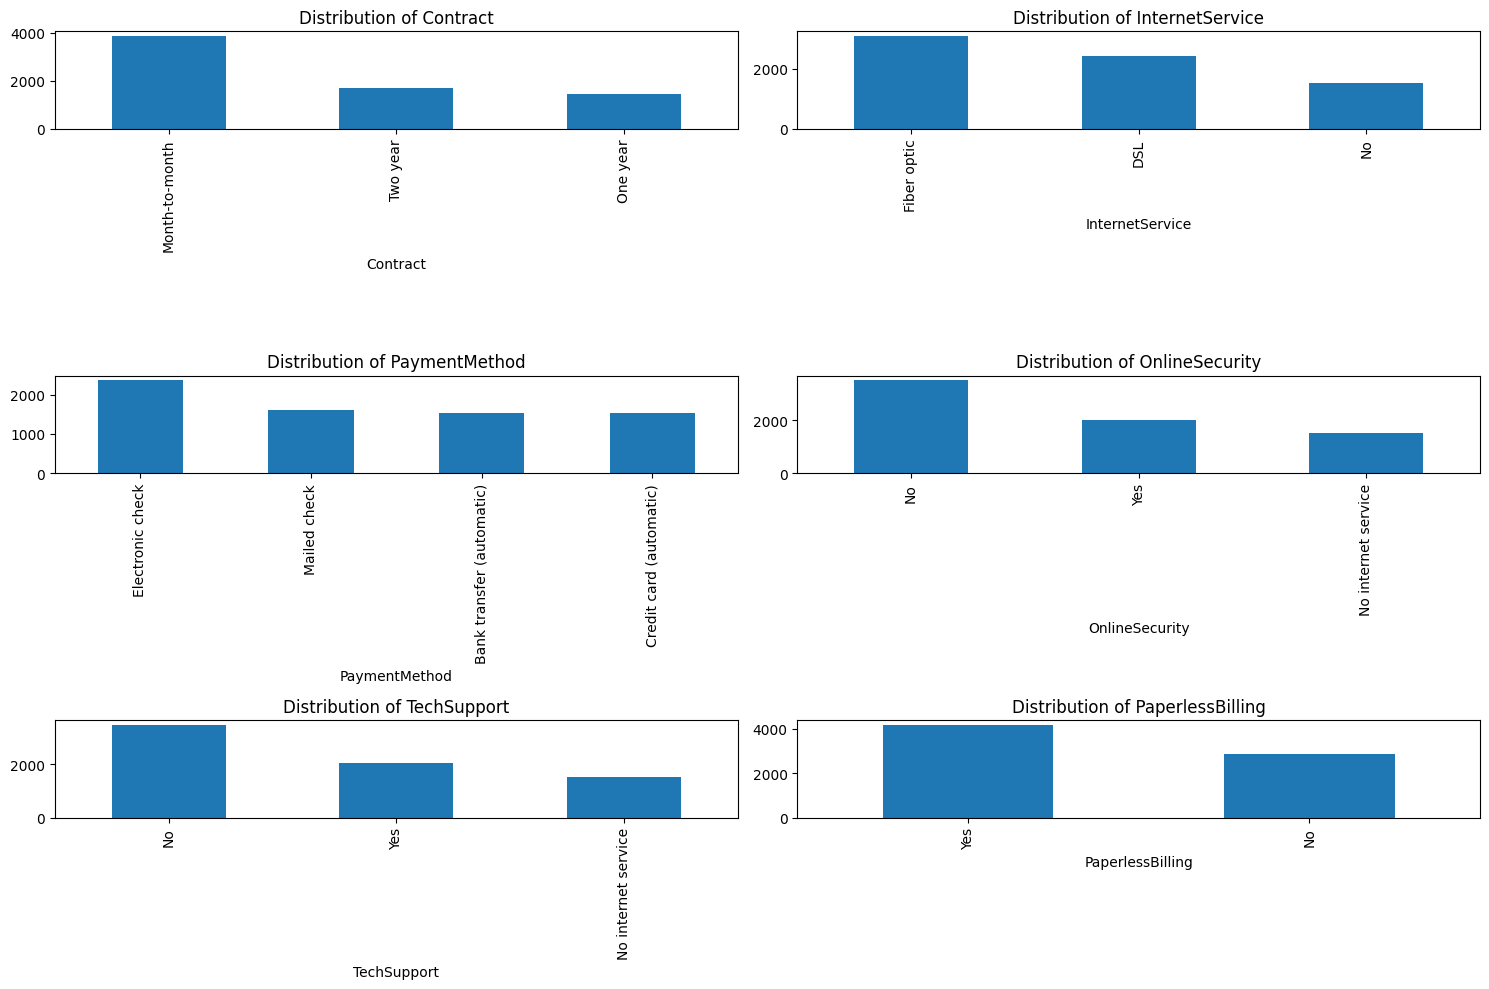

In [37]:
# Explore categorical features
categorical_features = ['Contract', 'InternetService', 'PaymentMethod', 'OnlineSecurity', 'TechSupport', 'PaperlessBilling']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 2, i + 1)
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

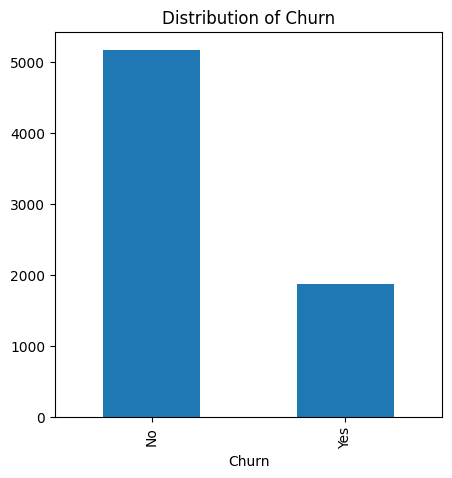


Churn rate: Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [38]:
#Aalyze the target variable 'Churn'
plt.figure(figsize=(5, 5))
df['Churn'].value_counts().plot(kind='bar')
plt.title('Distribution of Churn')
plt.show()
print(f"\nChurn rate: {df['Churn'].value_counts(normalize=True)}")

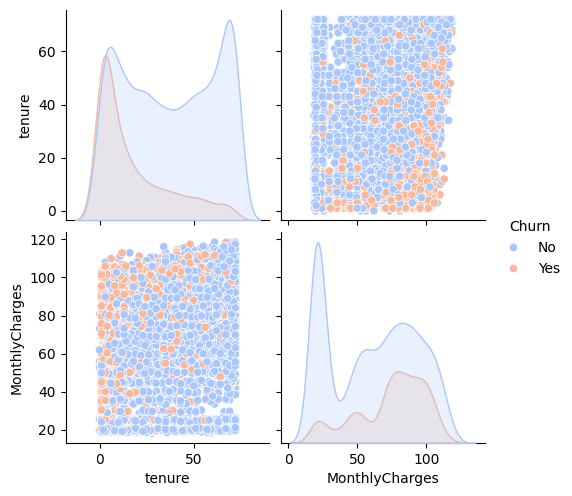

In [24]:
#pairplot
sns.pairplot(data[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn', palette='coolwarm')
plt.show()


STEP3-Splits

3.1-importing required libraries

In [ ]:
from sklearn.model_selection import train_test_split

3.2-Train and Test Split

In [39]:
# Separate features (X) and target variable (y)
X = data.drop(['customerID', 'Churn'], axis=1)
y = data['Churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

STEP4-Feature Engg

In [ ]:
from sklearn.preprocessing import StandardScaler

In [40]:
# One-hot encode categorical features
categorical_features = ['Contract', 'InternetService', 'PaymentMethod', 'OnlineSecurity', 'TechSupport', 'PaperlessBilling']
X_train_encoded = pd.get_dummies(X_train, columns=categorical_features)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_features)


In [41]:
# Align columns in training and testing sets
for col in X_train_encoded.columns:
    if col not in X_test_encoded.columns:
        X_test_encoded[col] = 0
for col in X_test_encoded.columns:
    if col not in X_train_encoded.columns:
        X_train_encoded[col] = 0
X_train_encoded = X_train_encoded[X_test_encoded.columns]

In [ ]:
# Scale numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded[numerical_features])
X_test_scaled = scaler.transform(X_test_encoded[numerical_features])

# Create dataframes from scaled numerical features
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_features, index=X_train_encoded.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_features, index=X_test_encoded.index)



In [42]:
# Drop original numerical features and concatenate scaled features
X_train_encoded = X_train_encoded.drop(numerical_features, axis=1)
X_test_encoded = X_test_encoded.drop(numerical_features, axis=1)
X_train = pd.concat([X_train_encoded, X_train_scaled_df], axis=1)
X_test = pd.concat([X_test_encoded, X_test_scaled_df], axis=1)

STEP5-Model training

In [44]:
from sklearn.linear_model import LogisticRegression

for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = X_train[col].astype('category').cat.codes

# Re-initialize and train the logistic regression model
logreg_model = LogisticRegression(max_iter=1000, solver='liblinear')
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

STEP6-Model evulation

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Convert y_pred to numeric values using a mapping
y_pred_numeric = [1 if pred == 'Yes' else 0 for pred in y_pred]

# Evaluate the model
accuracy = accuracy_score(y_test_numeric, y_pred_numeric)
precision = precision_score(y_test_numeric, y_pred_numeric)
recall = recall_score(y_test_numeric, y_pred_numeric)
f1 = f1_score(y_test_numeric, y_pred_numeric)
roc_auc = roc_auc_score(y_test_numeric, y_pred_proba)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"AUC-ROC: {roc_auc}")

Accuracy: 0.8130619971604354
Precision: 0.6860706860706861
Recall: 0.5749128919860628
F1-score: 0.6255924170616114
AUC-ROC: 0.8588555852141647


**Data Analysis Key Findings**

1.  The 'TotalCharges' column initially had an incorrect data type (object) and contained 11 missing values. These missing values were imputed with the median value after converting the column to numeric.
2.  The target variable ('Churn') is imbalanced, with approximately 73.5% of customers not churning and 26.5% churning.
3.  The final Logistic Regression model achieved an accuracy of 0.8131, precision of 0.6861, recall of 0.5749, F1-score of 0.6256, and AUC-ROC of 0.8589 on the test set.
4.  Data type inconsistencies between training and testing sets were identified and resolved by converting object-type columns to numerical categorical codes.

